# Lab: Regression Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
lr=LinearRegression()

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
x = range(1,11)
x = list(x)

In [5]:
student_data = pd.DataFrame({"StudentID": x,
                            "Age": [17,51,27,21,36,48,19,26,54,30], 
                             "Tardies": [10,1,5,9,4,2,9,6,0,3]})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

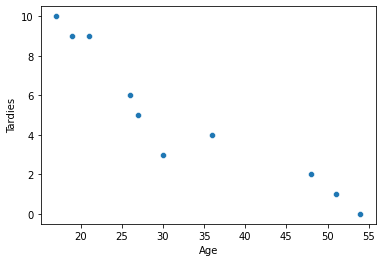

In [6]:
sns.scatterplot(x = "Age", y= "Tardies", data = student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

I can observe that the higher the age, the more there is a sense of responsibility. This translates into fewer delays. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
cov_sd = student_data[["Tardies", "Age"]].cov()
cov_sd

,Tardies,Age
Tardies,12.544444,-45.566667
Age,-45.566667,187.655556


In [9]:
corr_sd = (student_data[["Tardies", "Age"]].corr(method = 'pearson'))
corr_sd

,Tardies,Age
Tardies,1.000000,-0.939163
Age,-0.939163,1.000000


Correlation and covariance measure the dependence of two variables. Correlation in this case is much more illustrative since it is measured as a function of covariance (direction) and since it shows the direction and magnitude of the linear relationship of the variables. The correlation in this case also shows that there is a 'strong' and negative correlation between the two variables since the index that emerges from the calculation is close to 1 (in this case -1)



Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
lr.fit( X = student_data[["Tardies"]],
    y = student_data.Age)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [11]:
print(f"Intercept is:{beta_1}")        
print(f"Coef is: {beta_0}")

Intercept is:-3.632418069087687
Coef is: 50.69884853852967


In [16]:
X=student_data[["Tardies"]]
y = student_data.Age

Plot your regression model on your scatter plot.

<function matplotlib.pyplot.show(close=None, block=None)>

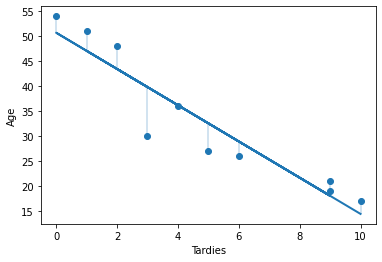

In [18]:
y_hat = beta_0 + beta_1 * X #Línea de regresión
plt.scatter(X,y) # pintar los puntos
plt.plot(X, y_hat, lw=2) # pintamos la línea de regresión
plt.vlines(X, y_hat, y, lw = 0.4) # pintamos las líneas que van desde los puntos a la línea
plt.xlabel("Tardies")
plt.ylabel("Age")
plt.show

Text(0.5, 0, 'Age')

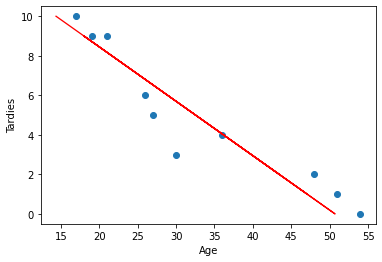

In [22]:
plt.scatter(student_data.Age,student_data.Tardies)
plt.plot(y_hat, student_data.Tardies,lw = 1.3, color = 'red')
plt.ylabel("Tardies")
plt.xlabel("Age")

In [23]:
results = smf.ols('Tardies ~ Age', data=student_data).fit()
results.summary()

/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           5.57e-05
Time:                        15:43:54   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

We know that this is a linear regression and that R2 measures how good and tight our regression model is, being a value between 0 and 1. In this case it is practically 0.9, so we can say that our model is good and therefore, knowing the age of an individual, we can predict whether that individual is likely to be late.



## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [24]:
cars = pd.read_csv("vehicles.csv")
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [25]:
cars.columns = cars.columns.str.replace(" ", "_")

In [28]:
cars.head(3)

,Make,Model,Year,Engine_Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_Barrels/Year,City_MPG,Highway_MPG,Combined_MPG,CO2_Emission_Grams/Mile,Fuel_Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [33]:
cars[cars.columns[1:]].corr()['CO2_Emission_Grams/Mile'][:]

Year                      -0.222300
Engine_Displacement        0.803520
Cylinders                  0.752393
Fuel_Barrels/Year          0.986189
City_MPG                  -0.894139
Highway_MPG               -0.926405
Combined_MPG              -0.926229
CO2_Emission_Grams/Mile    1.000000
Fuel_Cost/Year             0.930865
Name: CO2_Emission_Grams/Mile, dtype: float64

Fuel_barrels/Year is the variable that helps the most to determine CO2 emissions and Cylinders the worse.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [37]:
x1 = cars[['Cylinders', 'Fuel_Barrels/Year', 'Combined_MPG', 'Fuel_Cost/Year']]
y1 = cars['CO2_Emission_Grams/Mile']

In [40]:
lr.fit( X = x1, 
        y = y1)
beta_1bis = lr.coef_[0] 
beta_0bis= lr.intercept_ 

In [41]:
print(f"Intercept:{beta_1bis}")        
print(f"Coef: {beta_0bis}")

Intercept:1.0448363335225075
Coef: 131.1563247541892


I will use a Multiple Linear Regression because we try to summarize between more than two variables. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [42]:
results_c = smf.ols('y ~ x', data=cars).fit()
results_c.summary(xname=['Intercept','Cylinders', 'Fuel_Barrels/Year', 'Combined_MPG', 'Fuel_Cost/Year'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 4.470e+05
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:16:50   Log-Likelihood:            -1.5226e+05
No. Observations:               35952   AIC:                         3.045e+05
Df Residuals:                   35947   BIC:                         3.046e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           131.1563      1.688     77.714      0.000     127.848     134.464
Cylinders             1.0448      0.080     12.993      0.000       0.887       1.202
Fuel_Barrels/Year    19.6271      0.060    329.809      0.000      19.510      19.744
Combined_MPG         -3.1666      0.043    -73.810      0.000      -3.251      -3.082
Fuel_Cost/Year        0.0294      0.000     61.102      0.000       0.028       0.030
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

My conclusions are the following: 
- It should be noted that our multiple linear regression model is very reliable since the R2 and the adjusted ratio coefficient are equal and very close to 1. A single approximation making single linear regression models would have been helpful but not mandatory. 
- The variables most correlated with 'CO2_Emission_Grams/Mile' are Fuel_Barrels/Year and Combined MGP (t value). 


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 